In [6]:
!pip install seaborn
!pip install pandas
!pip install matplotlib

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
data = pd.read_csv('Mall_Customers.csv')
print("Dataset loaded successfully")
print(data.head())

Dataset loaded successfully
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [8]:
print("\nMissing values:")
print(data.isnull().sum())

data = data.dropna()

print(data.info())


Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [9]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

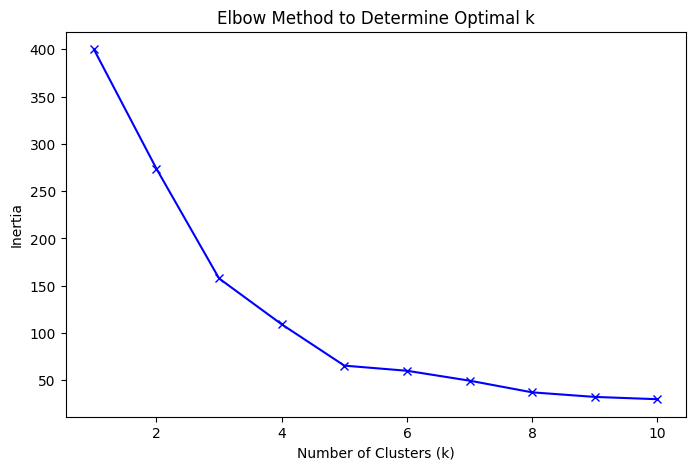

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [13]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_

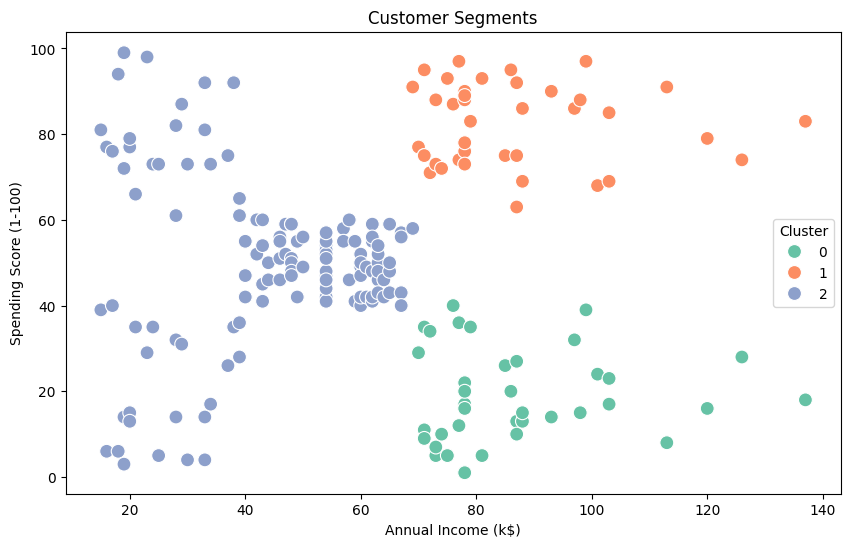

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[features[0]], y=data[features[1]], hue=data['Cluster'], palette='Set2', s=100)
plt.title('Customer Segments')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(title='Cluster')
plt.show()

In [15]:
print("\nCluster Centers:")
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(pd.DataFrame(cluster_centers, columns=features))


Cluster Centers:
   Annual Income (k$)  Spending Score (1-100)
0           87.000000               18.631579
1           86.538462               82.128205
2           44.154472               49.829268


In [16]:
print("\nCluster Counts:")
print(data['Cluster'].value_counts())


Cluster Counts:
Cluster
2    123
1     39
0     38
Name: count, dtype: int64


In [17]:
data.to_csv('segmented_customers.csv', index=False)
print("Segmented data saved as 'segmented_customers.csv'")

Segmented data saved as 'segmented_customers.csv'
